# House Prices: Advanced Regression Techniques

In [1]:
#Data analysis Step1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# What we can do in data analysis?




1. Missing values
2. All the Numerical variable
3. Distribution of the numerical variables
4. categorical variables
5. cardinality of categorical variables
6. outliers
7. relationship between independent and dependent feature (SalePrice)

# Missing Values

In [5]:
#All the features.

feature_with_null_values = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1]

In [6]:
for feature in feature_with_null_values:
    print(feature, np.round(dataset[feature].isnull().mean(),4), ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [7]:
1179/1460*100

80.75342465753424

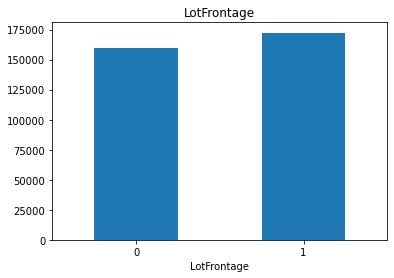

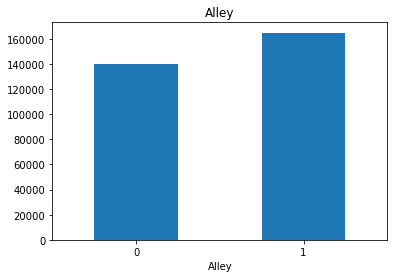

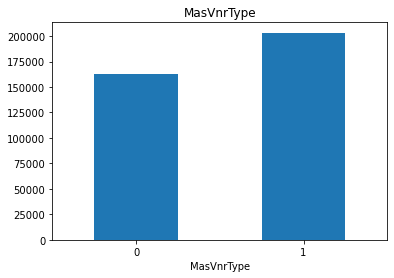

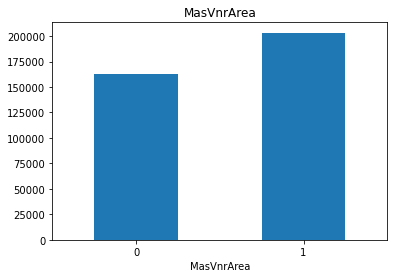

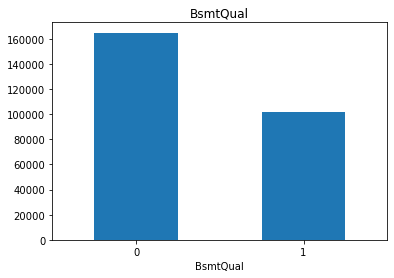

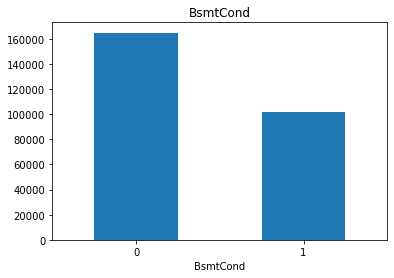

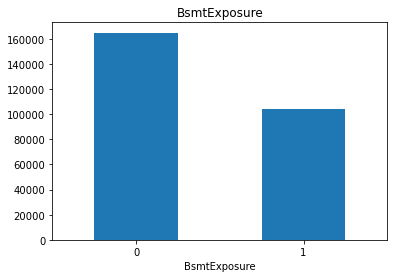

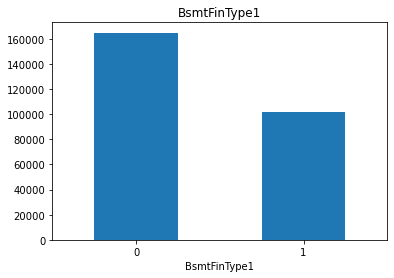

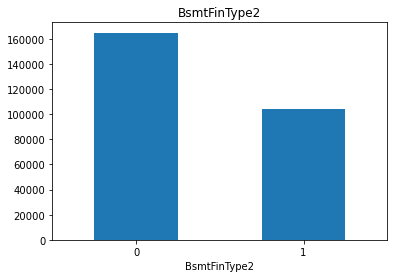

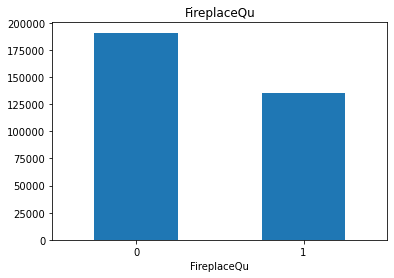

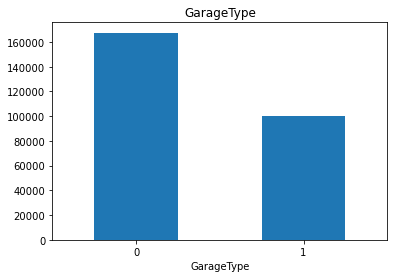

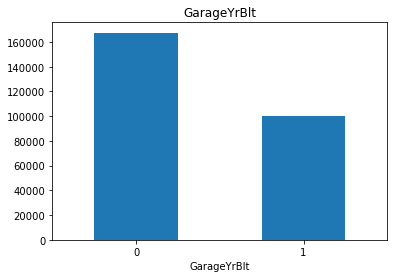

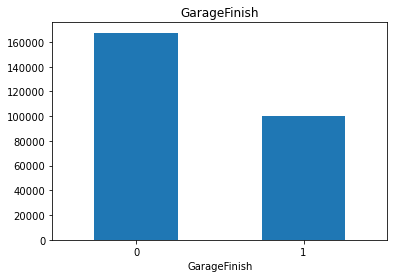

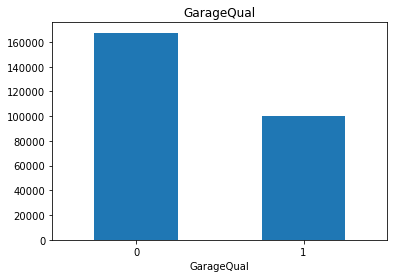

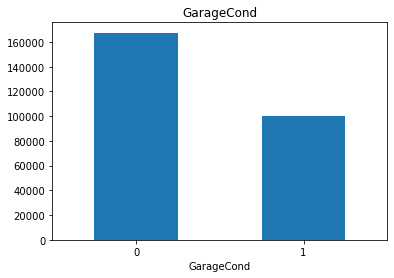

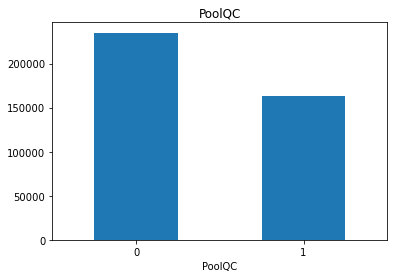

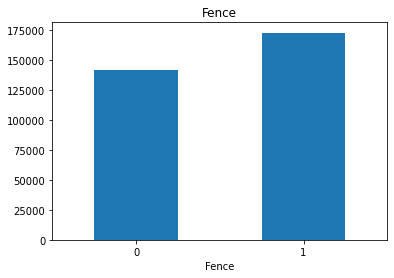

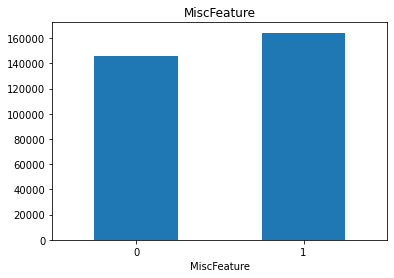

In [8]:
#Now important part is if we have missing values then will check what is the relationship with "Sales Price".

for feature in feature_with_null_values:
    data = dataset.copy()
    # if obeservation is missing then lets assign value as 1 else 0
    
    data[feature] = np.where(dataset[feature].isnull(), 1, 0)
    
    # lets calculate the mean salesprice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar(rot=0)
    plt.title(feature)
    plt.show()
    #print(data[feature])
    #print(data.groupby('LotFrontage')['SalePrice'].median())
    


In [9]:
#Now in above plots wherever we see null values bar i.e "1" it basically shows the median with respective to SalePrice, 
#Hence we can analyse that which missing values feature is most realted to SalePrice i,e dependent feature""
# Here realation between the missing values and the dependent variable is clearly visible so we need to replace thse nan values with something meaningful which can be done with feature engineering.


# Numerical Variables

In [25]:
#List of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("Total Numerical Feature: ", len(numerical_features))

Total Numerical Feature:  38


In [11]:
dataset[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [12]:
#Getting timeparel features

time_year =  [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]

In [13]:
time_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price graph vs YearSold')

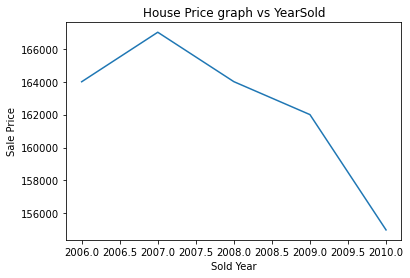

In [14]:
#lets check the "SalePrice" with respective to year. "YrSold"

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Sold Year')
plt.ylabel('Sale Price')
plt.title('House Price graph vs YearSold')


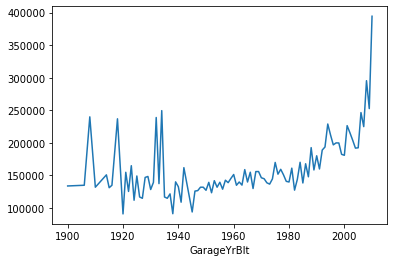

In [15]:
dataset.groupby('GarageYrBlt')['SalePrice'].median().plot()

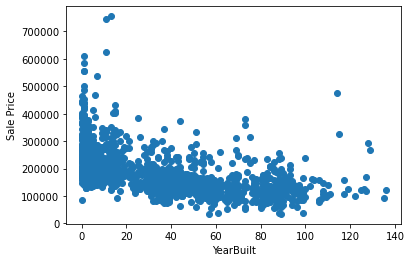

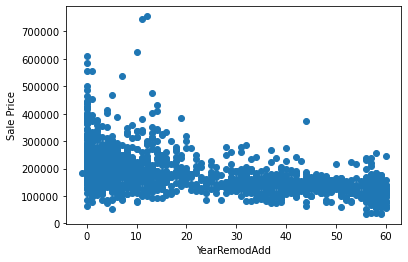

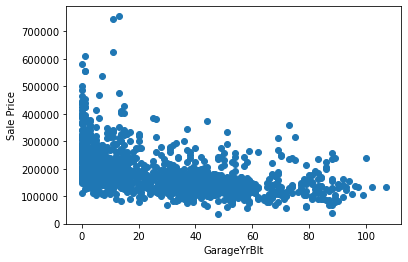

In [16]:
#Lets comapre th difference between  all years  feature with salesprice

for feature in time_year:
    
    data = dataset.copy()
    if feature!='YrSold':
        data[feature] = data['YrSold'] - data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

Types of numerical variables
1. Discrete 
2. Continues 


In [26]:
#Descrete
#Finding discrete feature by keeping threshold of 25, if the feature's unique values is less then 25 then that can be considered as descrete feature.
discrete_feature_th_25 = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in time_year+['Id']]
print("Total Descrete Feature: ",len(discrete_feature_th_25))
discrete_feature_th_25

Total Descrete Feature:  17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

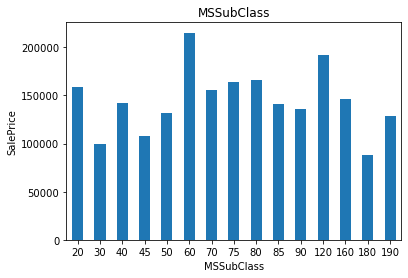

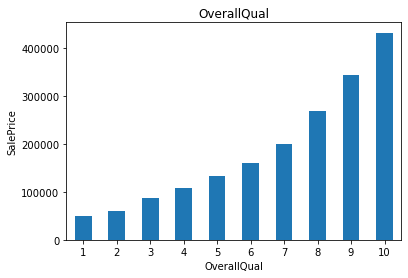

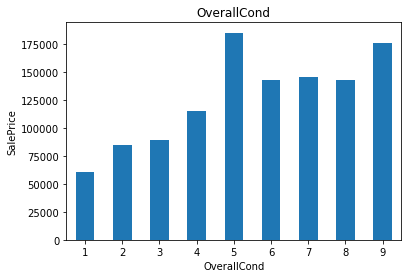

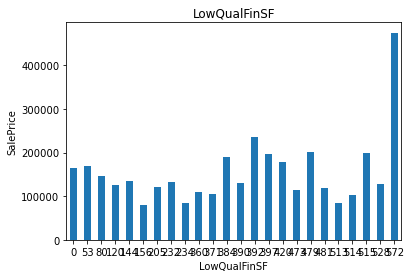

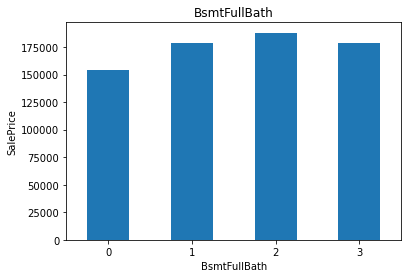

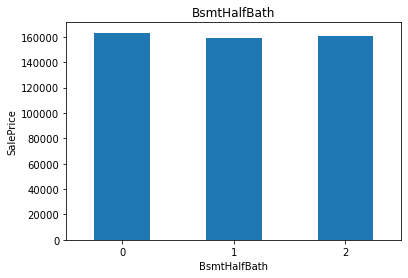

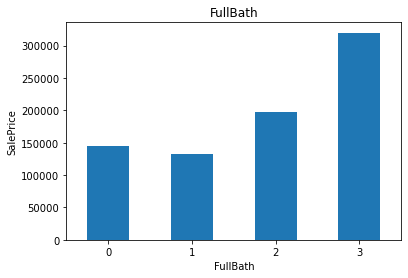

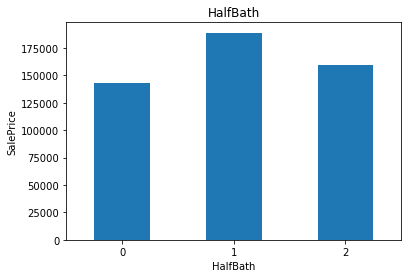

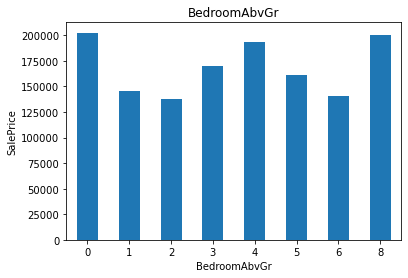

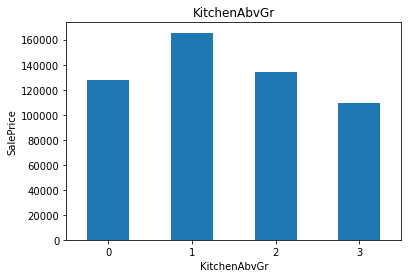

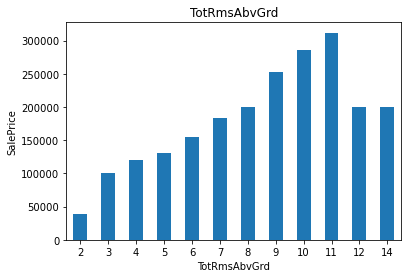

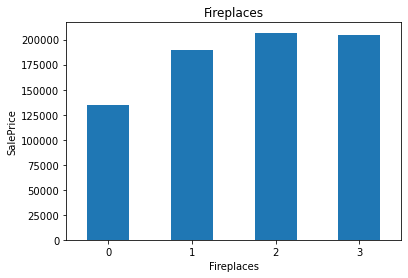

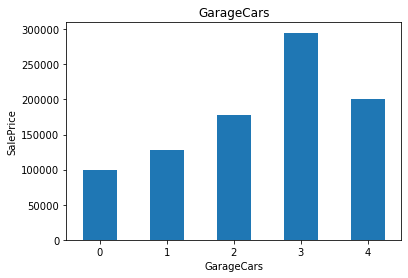

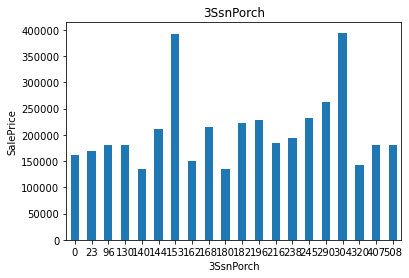

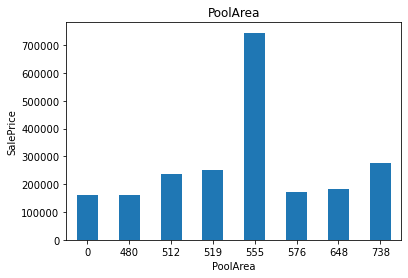

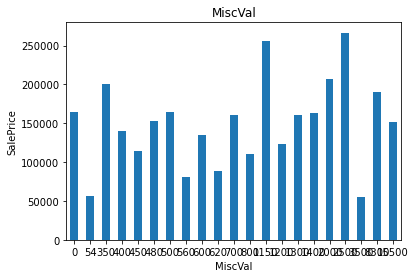

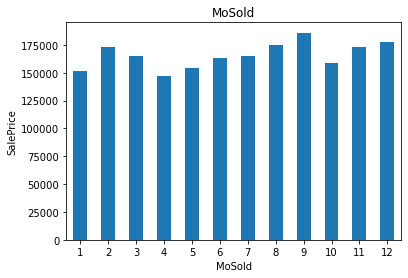

In [18]:
# Now lets find the relation between the descrete feature with "SalePrice" i.e dependent feature.
#Note we have to gather information from the data

for feature in discrete_feature_th_25:
    data = dataset.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar(rot=0)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


In [28]:
continues_feature = [feature for feature in numerical_features if feature not in discrete_feature_th_25 and feature not in time_year+['Id']]

In [29]:
print("Continues feature: ", len(continues_feature))

Continues feature:  16


In [30]:
continues_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

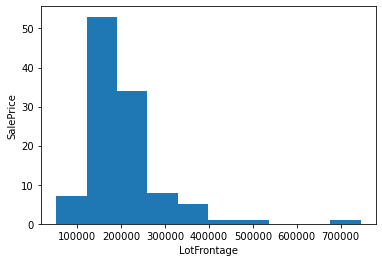

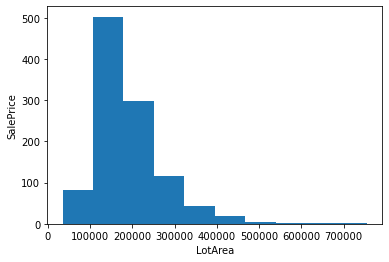

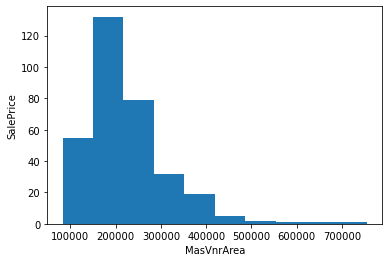

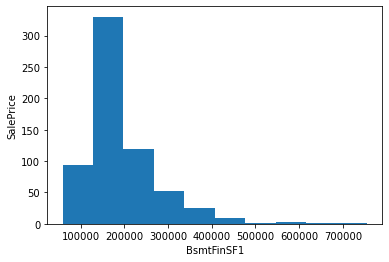

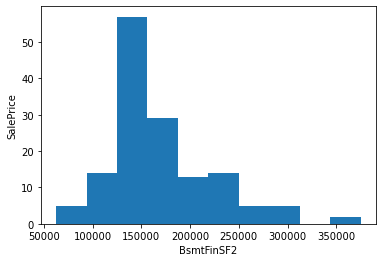

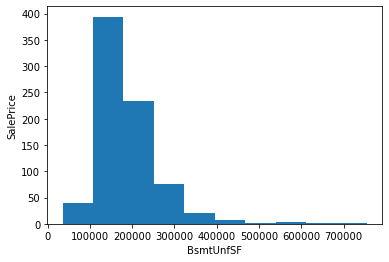

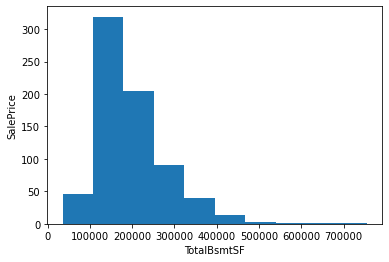

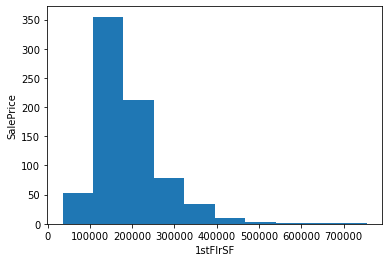

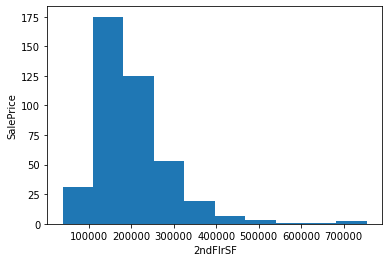

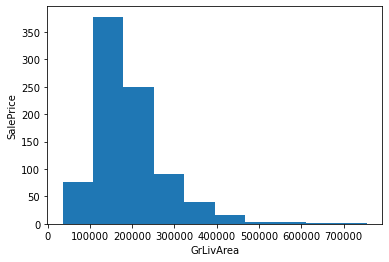

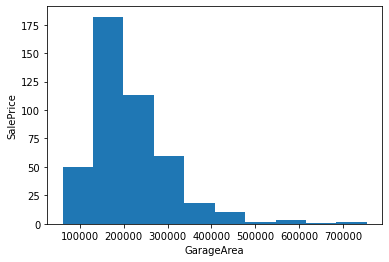

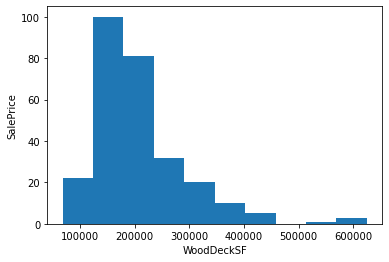

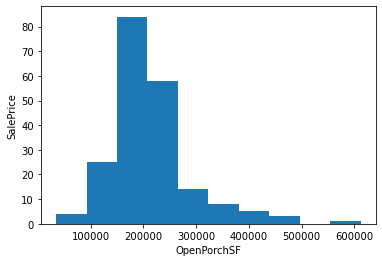

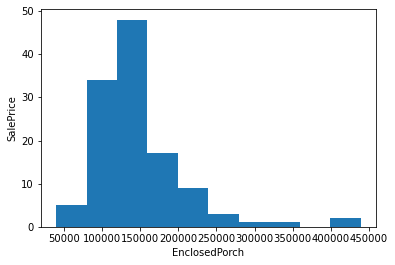

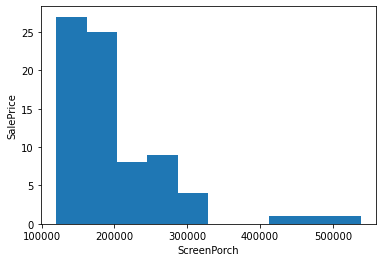

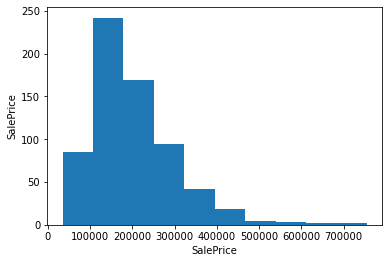

In [31]:
#In continiues feature we check the data is following gaussian distribution or not 
#if not then we have to convert them into gaussian/normal distribution
for feature in continues_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
#Note in above analysis, we come to know that some features are following gaussian/normal distribution and some feature are 
#non - gaussian/normal distribution.
# so next we have to focuss on how we can convert them into gaussian/normal distribution!!! which will helpfull for linear model prediction.